<h1>Principal Component Analysis</h1>

<h2>Dataset : MNIST Dataset</h2>
In this notebook I will try to reduce the 784 different variables into just 2 Principal components and try to show the different clusters of digits that exist in this data. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
columnlist = df.columns.tolist()
columnlistreordered  = columnlist[1:]
columnlistreordered.append(columnlist[0])

In [4]:
dfmain = df[columnlistreordered]
dfmain.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [5]:
#observing the data set we see that the 4th sample is number 4. Lets try to display this using matplotlib.
#this has 784 columns and is a 28x28 greyscale digit
displaydigit = dfmain.iloc[3,:-1].to_numpy()
#reshaping to 28x28 using numpy
reshapedpixels = displaydigit.reshape((28,28))
reshapedpixels.shape

(28, 28)

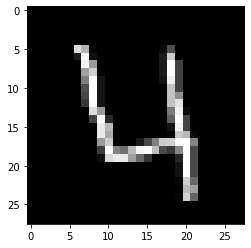

In [6]:
plt.imshow(reshapedpixels,cmap = 'gray')

As observed above, we required 274 variables to display this Image. Is there a way to reduce the number of variables to by reducing the dimensions? 

We shall use Principal component analysis

In [7]:
dfmain.shape

(13766, 785)

In [8]:
import time

<h3>Building a scaling function</h3>

In [9]:
def scaler(xcol,meanval,stdval):
    if np.std(xcol) != 0:
        xcol =  (xcol - meanval)/stdval
        return xcol
    else:
        return xcol
#np.mean(X.iloc[:,-1])
#np.std(X.iloc[:,-1])

<h3>Scaled X matrix</h3>

In [10]:
#create an empty array
X = dfmain.iloc[0:-1:,0:-1]
Y = dfmain.iloc[0:-1:,-1]
scaledxarray = np.zeros_like(X,shape = (13765,784))
variablelist = X.columns.tolist()
colcount = 0
for variable in variablelist:
    xcol = X[variable]
    meanval = np.mean(xcol,axis = 0)
    stdval = np.std(xcol,axis = 0)
    scaledcolumn = scaler(xcol,meanval,stdval)
    scaledxarray[:,colcount] = scaledcolumn
    colcount = colcount + 1

<h3>Covariance Matrix</h3>

In [11]:
#building the covariance matrix
#covariance matrix = X^T * X
covmat = np.dot(scaledxarray.T,scaledxarray)
print(covmat.shape)

(784, 784)


In [12]:
from numpy import linalg
#now we using the covariance matrix to carry out singular value deposition to produce the eigenvalues and eigenvectors
eigenval, eigenvec = linalg.eig(covmat)

In [13]:
eigenval.shape

(784,)

In [14]:
eigenval

array([ 5.53810537e+05,  3.99053262e+05,  3.73813058e+05,  2.88221043e+05,
        2.49049860e+05,  2.17343585e+05,  1.86816491e+05,  1.74752552e+05,
        1.53316442e+05,  1.37097535e+05,  1.32366307e+05,  1.18459288e+05,
        1.11928507e+05,  1.09635281e+05,  1.04199600e+05,  9.92603397e+04,
        9.24291671e+04,  8.98721114e+04,  9.04279448e+04,  8.68976226e+04,
        8.24394042e+04,  7.85551121e+04,  7.55809425e+04,  7.35834072e+04,
        7.19512929e+04,  6.83170668e+04,  6.75074836e+04,  6.61401254e+04,
        6.29717872e+04,  6.17403474e+04,  6.01808620e+04,  5.89271610e+04,
        5.72313374e+04,  5.68976213e+04,  5.52532716e+04,  5.49341498e+04,
        5.38858784e+04,  5.33062126e+04,  5.13506654e+04,  4.99352609e+04,
        4.91974130e+04,  4.79341112e+04,  4.74843718e+04,  4.65034319e+04,
        4.55042878e+04,  4.50162776e+04,  4.45249198e+04,  4.34065145e+04,
        4.23077438e+04,  4.22041132e+04,  4.17748508e+04,  4.10880294e+04,
        4.07642962e+04,  

<h3>Calculating the percentage variance for each eigenvector</h3>

In [16]:
total = np.sum(eigenval)
variance = 100*(eigenval/total)
variance

array([ 5.89930193e+00,  4.25079612e+00,  3.98193235e+00,  3.07018888e+00,
        2.65292952e+00,  2.31518786e+00,  1.99000708e+00,  1.86149955e+00,
        1.63315777e+00,  1.46039069e+00,  1.40999269e+00,  1.26185231e+00,
        1.19228511e+00,  1.16785720e+00,  1.10995523e+00,  1.05734123e+00,
        9.84574196e-01,  9.57335920e-01,  9.63256770e-01,  9.25651064e-01,
        8.78161219e-01,  8.36784954e-01,  8.05103497e-01,  7.83825347e-01,
        7.66439735e-01,  7.27727223e-01,  7.19103379e-01,  7.04538002e-01,
        6.70788223e-01,  6.57670677e-01,  6.41058722e-01,  6.27704046e-01,
        6.09639789e-01,  6.06084978e-01,  5.88569032e-01,  5.85169682e-01,
        5.74003283e-01,  5.67828566e-01,  5.46997681e-01,  5.31920506e-01,
        5.24060800e-01,  5.10603854e-01,  5.05813139e-01,  4.95363969e-01,
        4.84720883e-01,  4.79522500e-01,  4.74288457e-01,  4.62374978e-01,
        4.50670650e-01,  4.49566756e-01,  4.44994166e-01,  4.37678005e-01,
        4.34229534e-01,  

Selecting the first 2 eigenvectors to project the pixels of the original pixel data set onto 

In [32]:
#this produces the list of eigen values in ascending order
idx = eigenval.argsort()
#turning to descending order
idx = idx[::-1]

In [34]:
eigenvec = eigenvec[idx]

<h3>The eigenvectors which contribute the most to the total variance</h3>

In [40]:
eigenvec[:,0:2]

array([[ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       ...,
       [-0.00783901,  0.03894539],
       [-0.03143637,  0.01638406],
       [-0.05076904, -0.01320779]])

<h3> Projecting the pixels onto the 2 eigenvectors which describe the most variance </h3>

In [41]:
transformedpixels = np.dot(scaledxarray,eigenvec[:,0:2])
transformedpixels

array([[-2.94469758, -1.53012757],
       [ 6.68541277,  1.77935231],
       [-3.8473378 , -0.38249294],
       ...,
       [ 4.82896417, -4.15851862],
       [ 0.28366745,  2.6197951 ],
       [ 0.05281556, -1.05935331]])

In [51]:
transformeddataset = pd.DataFrame(transformedpixels,columns = ['PC1','PC2'])
transformeddataset['Label'] = Y.to_numpy()

In [52]:
transformeddataset

,PC1,PC2,Label
0,-2.944698,-1.530128,1
1,6.685413,1.779352,0
2,-3.847338,-0.382493,1
3,-3.011786,1.933216,4
4,10.582286,2.051263,0
...,...,...,...
13760,1.963100,3.132663,4
13761,-2.285193,1.977328,7
13762,4.828964,-4.158519,2
13763,0.283667,2.619795,6


Text(0, 0.5, 'PC2')

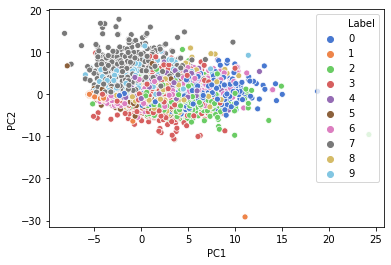

In [59]:
import seaborn as sns
fig = plt.figure()
ax1 = fig.add_subplot(111)
sns.scatterplot(x = 'PC1',y = 'PC2',hue = 'Label',data = transformeddataset.iloc[0:13000,:], palette = sns.color_palette("muted"))
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')

<h3> The variance is from PC2 and PC1 are insufficient to give a clear separation of clusters of digits </h3>